# 1. Problem statement
- Based on the features provided for the customer predict the loan will be approved or not for the person

# 2. Data Collection
- Its from a Kaggle competition "https://www.kaggle.com/competitions/playground-series-s4e10/data?select=train.csv"

### 2.1 Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import data to pandas dataframe

In [3]:
df = pd.read_csv('Data/train.csv') 

top 5 recods

In [4]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


Shape of data frame

In [5]:
df.shape

(58645, 13)

### 3. Check for the following points in df
- Missing values 
- Duplicate values 
- Data types
- Number of unique values in category column
- 5 point summary of numerical data

#### 3.1 checking for data types

In [6]:
df.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

#### 3.2 checking 5 point summary of numerical columns

In [8]:
num_cols = [col for col in df.columns if df[col].dtype in ('int64','double','float')]

In [9]:
num_cols

['id',
 'person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_status']

In [10]:
df[num_cols].describe().round(2)

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.0,58645.00,58645.00,58645.00,58645.00,58645.00,58645.00,58645.00,58645.00
mean,29322.0,27.55,64046.17,4.70,9217.56,10.68,0.16,5.81,0.14
std,16929.5,6.03,37931.11,3.96,5563.81,3.03,0.09,4.03,0.35
min,0.0,20.00,4200.00,0.00,500.00,5.42,0.00,2.00,0.00
25%,14661.0,23.00,42000.00,2.00,5000.00,7.88,0.09,3.00,0.00
50%,29322.0,26.00,58000.00,4.00,8000.00,10.75,0.14,4.00,0.00
75%,43983.0,30.00,75600.00,7.00,12000.00,12.99,0.21,8.00,0.00
max,58644.0,123.00,1900000.00,123.00,35000.00,23.22,0.83,30.00,1.00


#### 3.3 checking uniqu values of categorical columns 

In [11]:
cat_cols = [col for col in df.columns if df[col].dtype =='object']

In [12]:
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [13]:
for col in cat_cols:
    print(col, df[col].unique())

person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
loan_grade ['B' 'C' 'A' 'D' 'E' 'F' 'G']
cb_person_default_on_file ['N' 'Y']


In [14]:
df.nunique()

id                            58645
person_age                       53
person_income                  2641
person_home_ownership             4
person_emp_length                36
loan_intent                       6
loan_grade                        7
loan_amnt                       545
loan_int_rate                   362
loan_percent_income              61
cb_person_default_on_file         2
cb_person_cred_hist_length       29
loan_status                       2
dtype: int64

#### 3.4 checking for missing values 

In [15]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

Found no missing values in df

#### 3.5 checking duplicate data

In [16]:
df.duplicated().sum()

0

there are no duplicates in data 

### 4. Data Visualisation

Age distribution 

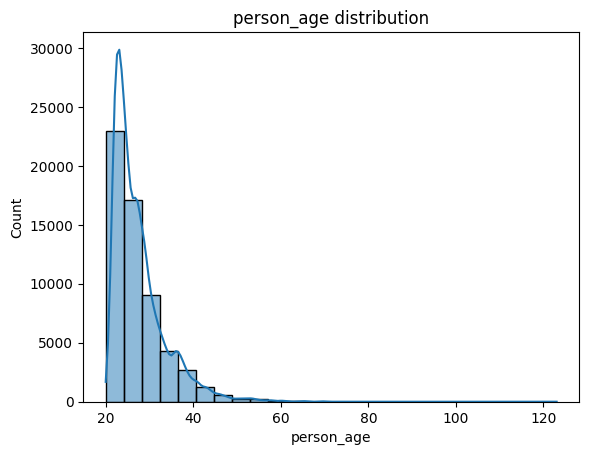

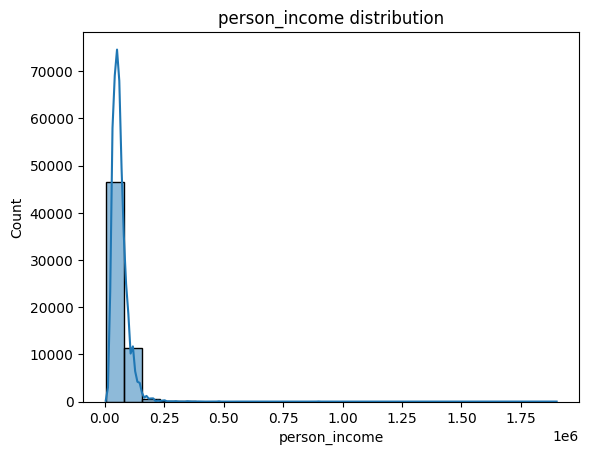

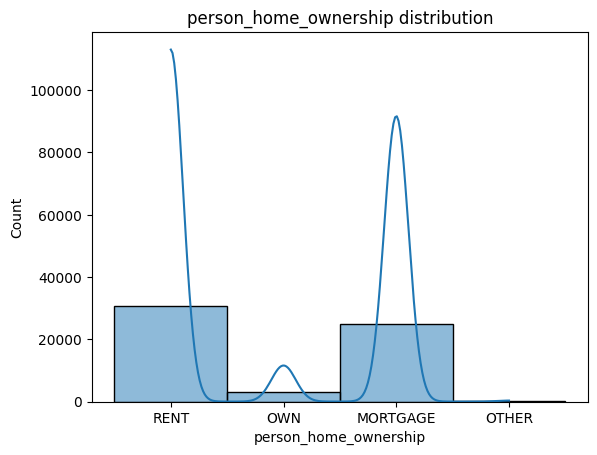

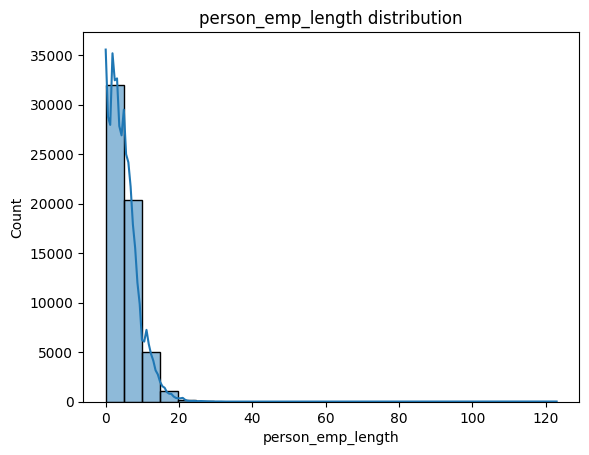

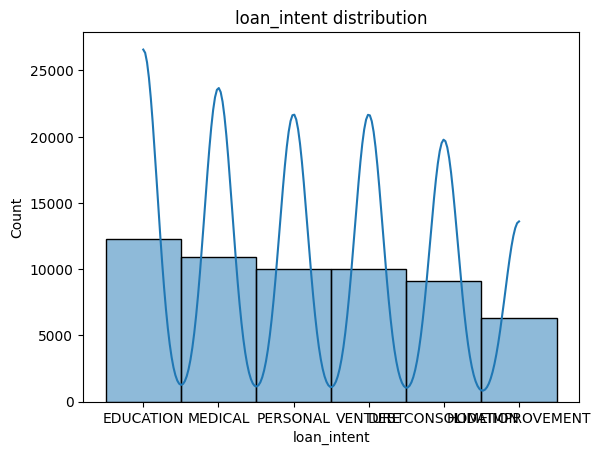

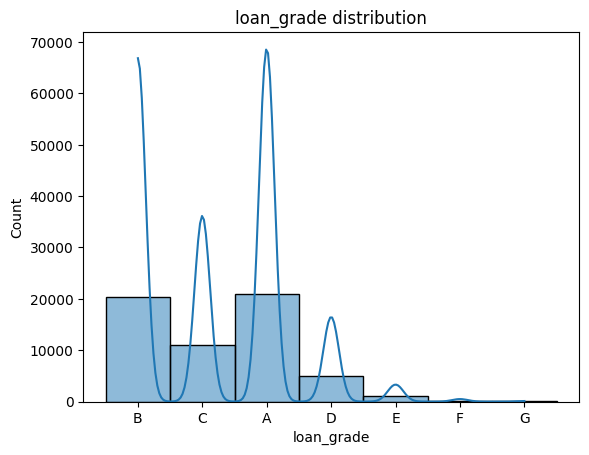

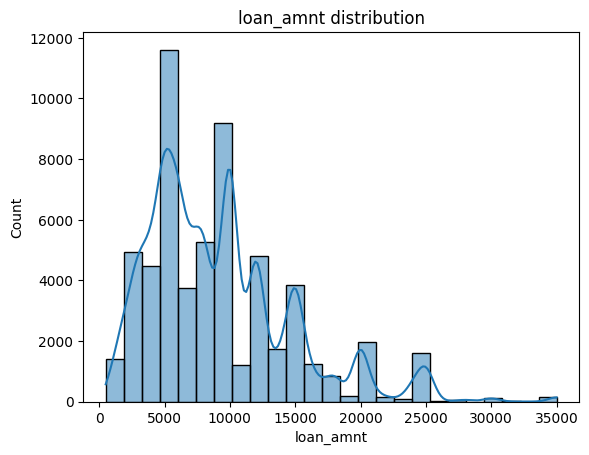

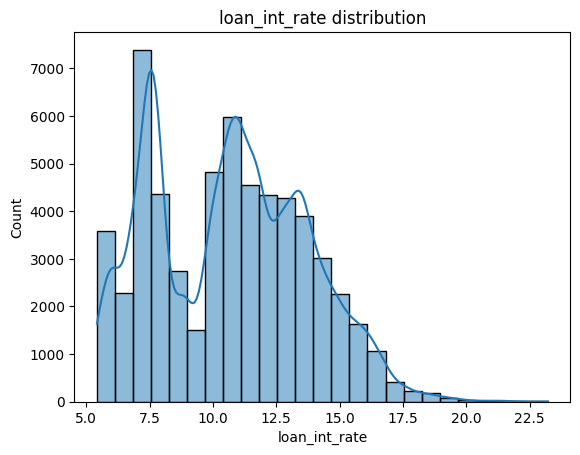

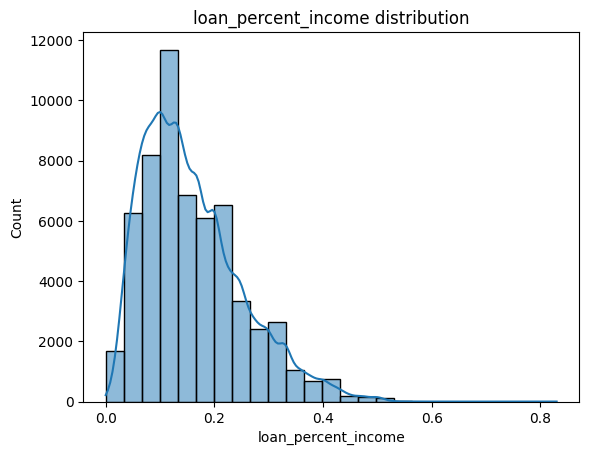

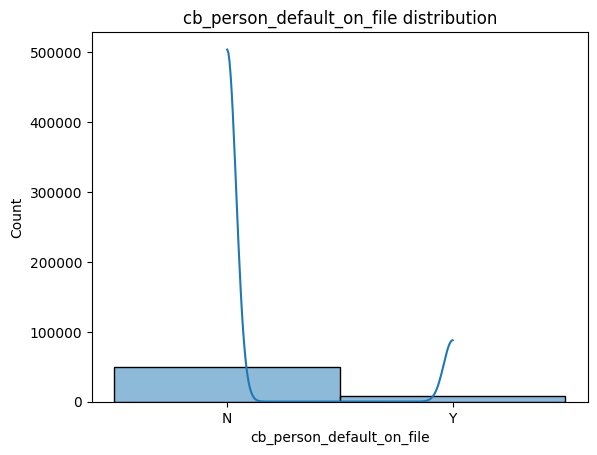

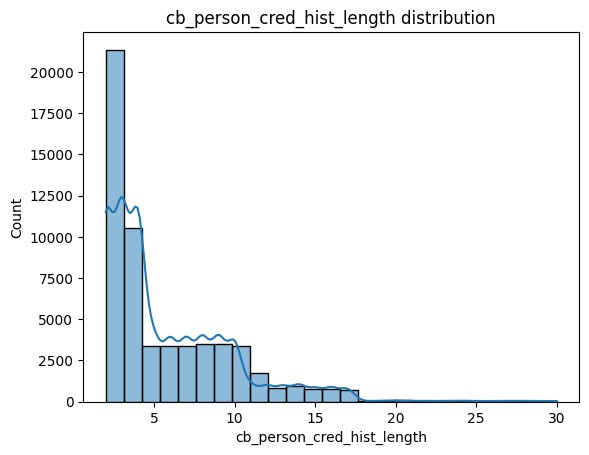

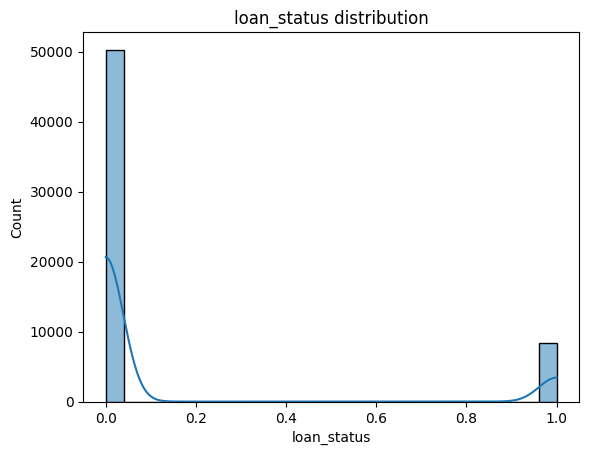

In [24]:
for col in df.columns:
    if col == 'id':
        continue
    x = df[col]
    sns.histplot(x,kde=True,bins=25)
    plt.title(f'{col} distribution')
    plt.show()

Observations:
- "person_age", "person_income", "person_emp_length", "cb_person_cred_hist_length" have right skewed data
- "owner" and "Other" have very less data for "person_home_ownership" column
- "Loan" status is also very imbalanced data

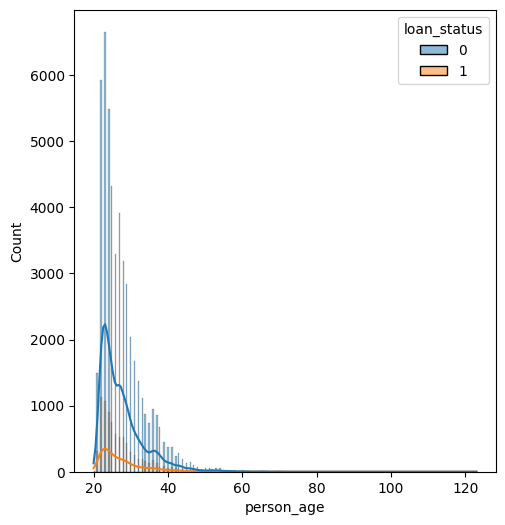

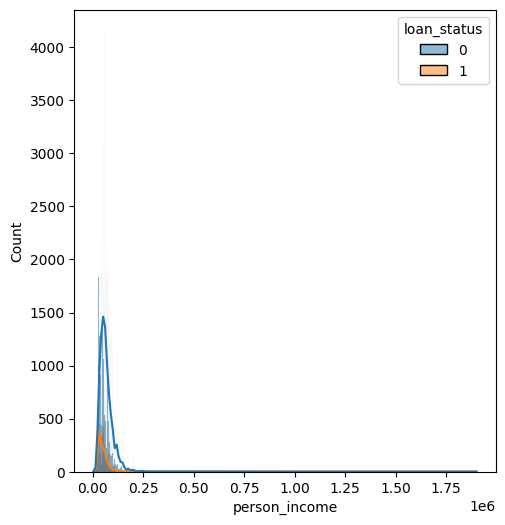

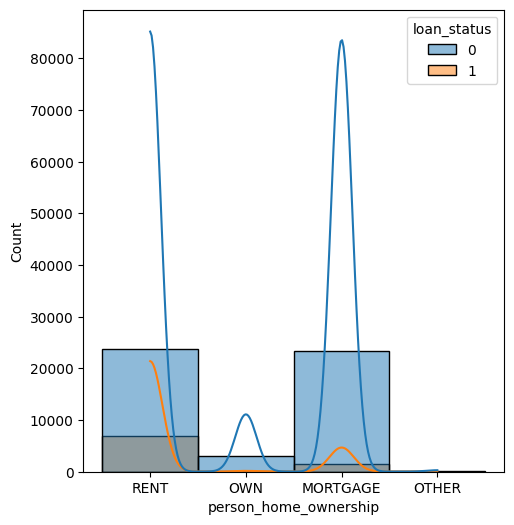

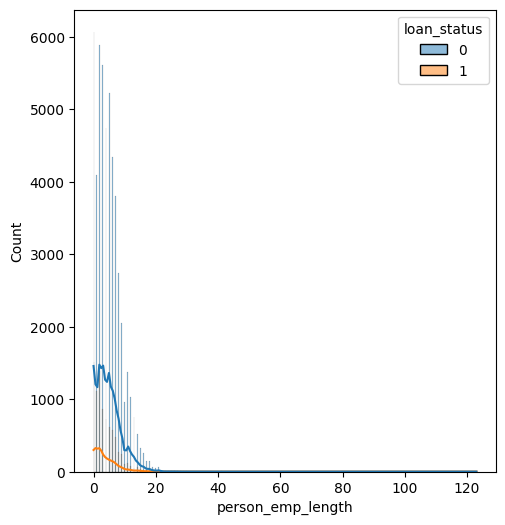

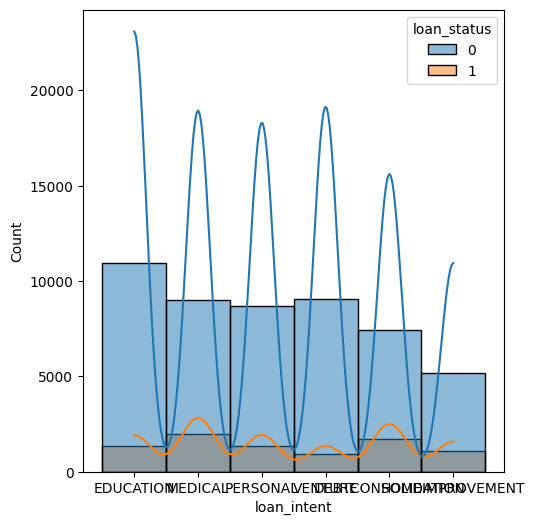

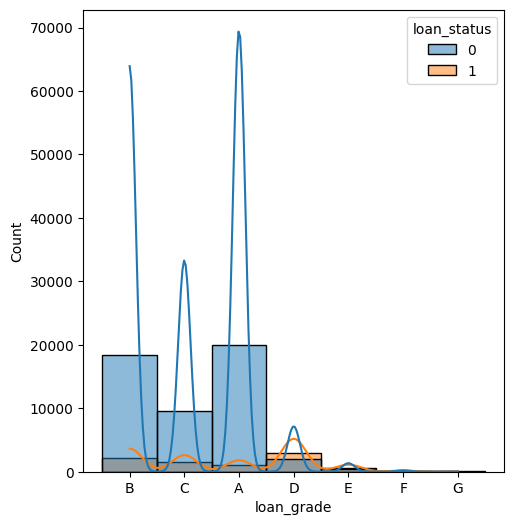

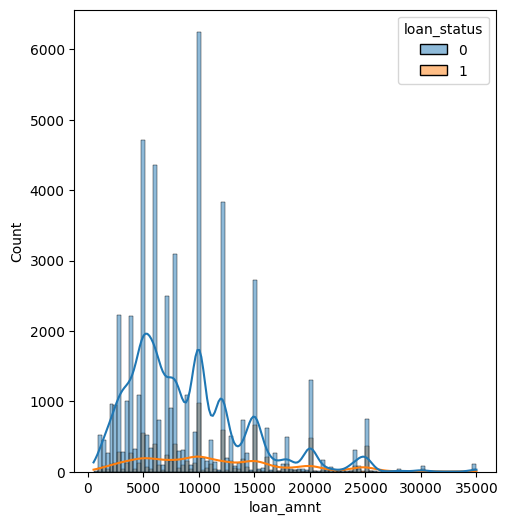

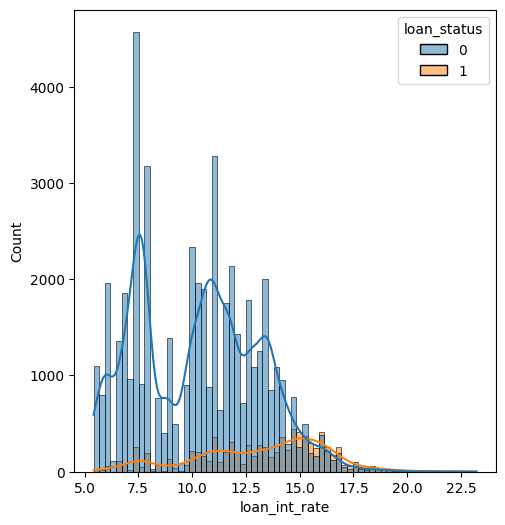

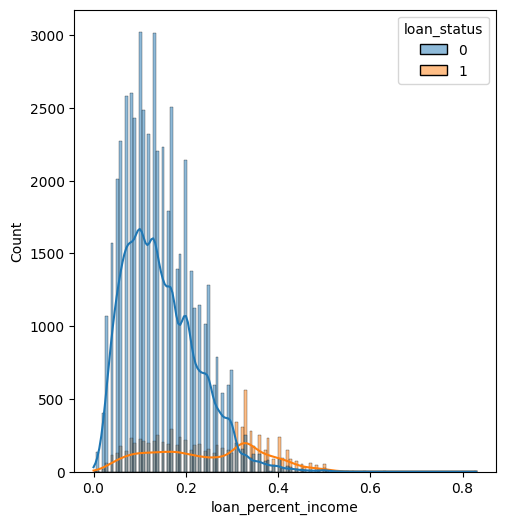

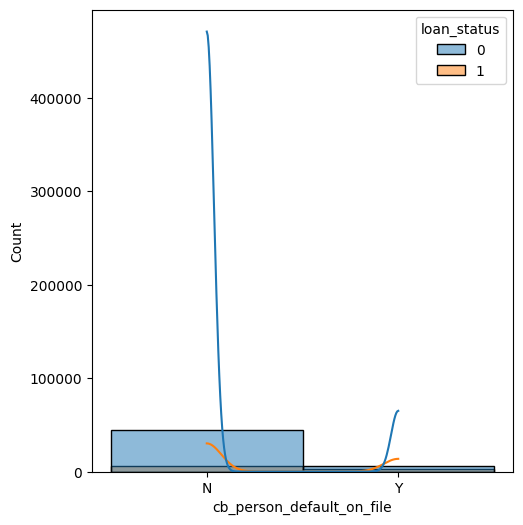

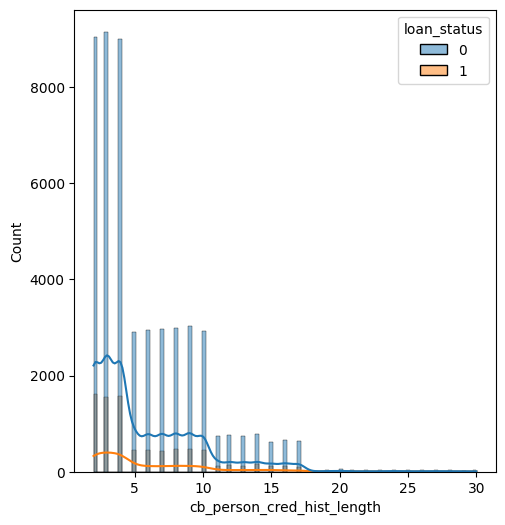

In [28]:
for col in df.columns:
    if col in ('id','loan_status') :
        continue
    x = df[col]
    plt.subplots(1,1,figsize = (25,6))
    plt.subplot(141)
    sns.histplot(data= df, x= col,kde=True,hue='loan_status')
    # plt.subplot(142)
    # sns.histplot(data= df[df.loan_status==0], x= col,kde=True,hue='loan_status')
    # plt.subplot(143)
    # sns.histplot(data= df[df.loan_status==1], x= col,kde=True,hue='loan_status')
    plt.show()
